# Introduction

In this example, I am going to try to model the relationship between two variables, the Income and amount of Happiness someone has. So, the question I am trying to answer is, __based on someone's Income can I successfully predict their number of Happiness, on a scale 0 to 10?__

The linear model will take the following form:

$y = \beta_0 + \beta_1x$

Where $y$ is the output, $x$ is the input, $\beta_0$ is the intercept, $\beta_1$ is the coefficient for x.

## 1. Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 2. Load the data

In [2]:
# load data
df = pd.read_csv("income_happiness.csv")
# print first 5 rows
df.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


## 3. Check the data

In [3]:
# check the data types
df.dtypes

income       float64
happiness    float64
dtype: object

In [4]:
# check for missing values
df.isna().any()

income       False
happiness    False
dtype: bool

## 4. Explore the Data

### Build Scatter Plot

Scatter plots help us visualize the relationship between our datapoints.

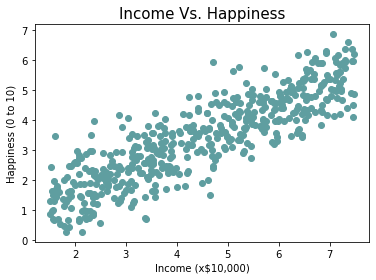

In [5]:
# define x,y
x = df['income']
y = df['happiness']

# create scatter plot
plt.plot(x, y, 'o', color='cadetblue')
plt.title("Income Vs. Happiness", fontsize=15)
plt.xlabel("Income (x$10,000)")
plt.ylabel("Happiness (0 to 10)")

plt.show()

At a first glance, it seems like there is a positive relationship between Income and Happiness, because if one goes up the other appears to go up as well. Let's measure this correlation.

In [6]:
# correlation
df.corr()

,income,happiness
income,1.000000,0.865634
happiness,0.865634,1.000000


There seems to be a strong relationship between Income and Happiness (0.865). Now let's see the statistical summary.

In [7]:
# statistical summary.
df.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


## 5. Build the Model

### Split the data

In [8]:
# define X, Y
Y = df.drop(columns=['income'])
X = df[['income']]

# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### Create and Fit model

In [9]:
# create a Linear Regression model object
regression_model = LinearRegression()

# fit model
regression_model.fit(X_train, y_train)

LinearRegression()

### Explore output

In [10]:
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print(f"The coefficient is {coefficient}")
print(f"The intercept is {intercept}")

The coefficient is 0.7203829375274037
The intercept is 0.1718388532877868


Interpreting the coefficient, a 10.000$ increase in someone's Income is associated with a 0.72 increase in Happiness.

### Prediction

In [11]:
prediction = regression_model.predict([[5]])
predicted_value = prediction[0][0]
print(f"The predicted value is {predicted_value}")

The predicted value is 3.773753540924805


Interpreting the output, an Income of 50.000$ is associated with 3.77 points of Happiness.

### Multiple Predictions

In [12]:
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[1.48891955],
       [4.68992679],
       [2.96873534],
       [1.70224143],
       [4.8264083 ]])

## 6. Evaluate the Model

I am going to recreate the same model using the statsmodel.api library so as to do that.

In [13]:
# define X
X_2 = sm.add_constant(X)

# create a OLS model.
model = sm.OLS(Y, X_2)

# fit the data
est = model.fit()

In [14]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1483.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          3.96e-151
Time:                        22:45:20   Log-Likelihood:                -540.72
No. Observations:                 498   AIC:                             1085.
Df Residuals:                     496   BIC:                             1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2043      0.089      2.299      0.0

__Confidence Intervals__: according to the summary, with 95% confidence, the Income coefficient exists between 0.677 and 0.750.

__Hypothesis Test__:

* Null Hypothesis: There is no relationship between Income and Happiness (income coef = 0).
* Alternative Hypothesis: There is a relationship between Income and Happiness (income coeff not 0).

The p-value for the income coefficient is 0, much lower than 0.05 (level of significance), so we can reject the null hypothesis and say that there is a relationship between the two variables.

__R-squared__: according to the summary, R-squared is 0.749. This means that 74,9% of the variation in Happiness is explained by Income.


## 7. Plot the line

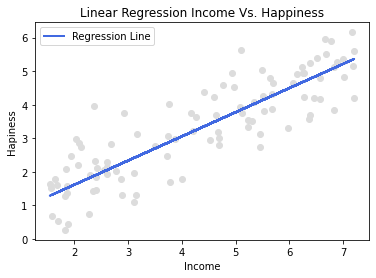

In [15]:
plt.scatter(X_test, y_test,  color='gainsboro')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 2, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Income Vs. Happiness")
plt.xlabel("Income")
plt.ylabel("Hapiness")
plt.legend()
plt.show()